In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Bhuvana P\Downloads\All Appliances.csv\All Appliances.csv")
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Pigeon by Stovekraft Amaze Plus Electric Kettl...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Amaze-Plus-1-5-Lt...,3.9,"128,941",₹599,"₹1,245"
1,Pigeon Polypropylene Mini Handy and Compact Ch...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pigeon-Stovekraft-Plasti...,4.1,"274,505",₹199,₹545
2,Glun Multipurpose Portable Electronic Digital ...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Multipurpose-Portable-El...,3.8,365,₹199,₹899
3,beatXP Kitchen Scale Multipurpose Portable Ele...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/beatXP-Multipurpose-Port...,3.7,"3,290",₹299,"₹1,999"
4,Bajaj DX-6 1000W Dry Iron with Advance Solepla...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bajaj-Majesty-1000-Watt-...,4.2,"24,380",₹625,"₹1,400"


In [3]:
df.isnull()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
9571,False,False,False,False,False,False,False,False,False
9572,False,False,False,False,False,False,False,False,False
9573,False,False,False,False,False,False,False,False,False
9574,False,False,False,False,False,True,True,False,False


In [4]:
df.isnull().sum()

name                0
main_category       0
sub_category        0
image               0
link                0
ratings           478
no_of_ratings     478
discount_price    362
actual_price       91
dtype: int64

In [5]:
df['discount_price'] = df['discount_price'].replace('[₹,]', '', regex=True)
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True)



In [8]:
df['discount_price'] = pd.to_numeric(df['discount_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')


In [10]:
df['discount_price'] = df['discount_price'].fillna(df['discount_price'].mean())
df['actual_price'] = df['actual_price'].fillna(df['actual_price'].median())
df['no_of_ratings'] = df['no_of_ratings'].fillna(0)
df['ratings'] = df['ratings'].fillna(df['ratings'].median())


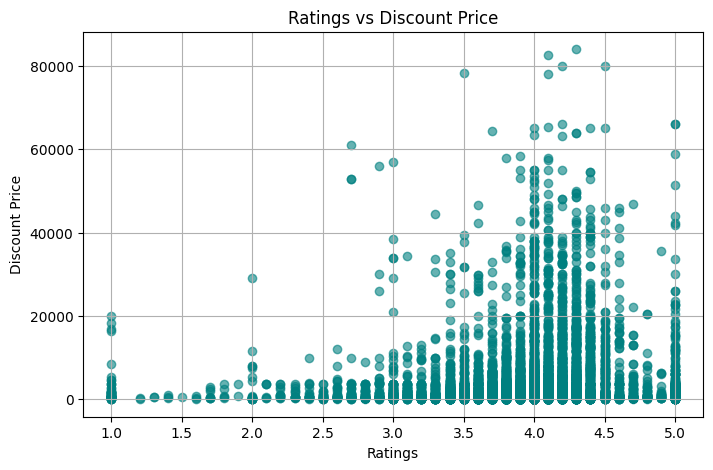

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
plt.scatter(df['ratings'], df['discount_price'], alpha=0.6, color='teal')
plt.title('Ratings vs Discount Price')
plt.xlabel('Ratings')
plt.ylabel('Discount Price')
plt.grid(True)
plt.show()


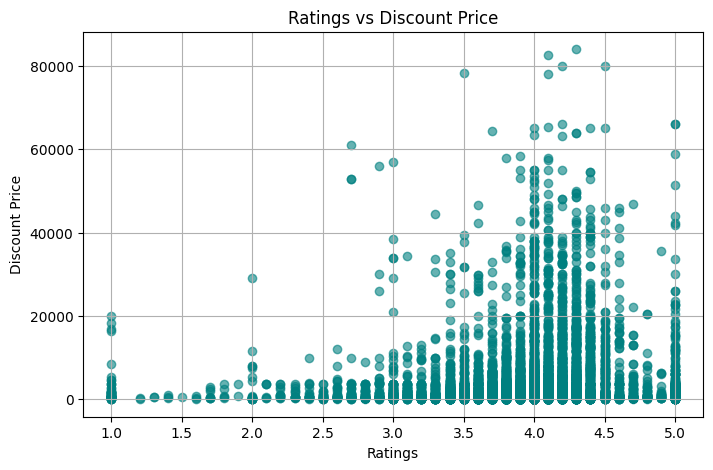

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(df['ratings'], df['discount_price'], alpha=0.6, color='teal')
plt.title('Ratings vs Discount Price')
plt.xlabel('Ratings')
plt.ylabel('Discount Price')
plt.grid(True)
plt.show()


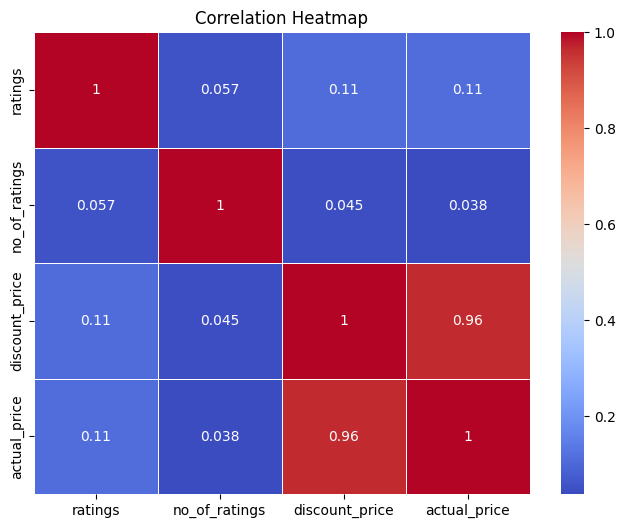

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['ratings', 'no_of_ratings', 'discount_price', 'actual_price']].corr(), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
